# CFDPython

This notebook consists of my run-through of Prof. Lorena Barba's CFDPython course. It is set in a "teacher first, student next" fashion, with the student developing the stock functions with his/her own ideas. The development is chronologically presented.

#### Python libraries

In [1]:
import numpy
import sympy
from sympy import init_printing
from sympy.utilities.lambdify import lambdify
from matplotlib import pyplot
import time, sys

### Step 1: 1-D Linear Convection

Partial Differential Equation: $$ \frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0 $$

Discretised: $$ \frac{u^{n+1}_i - u^n_i}{\Delta t} + c\frac{u^n_i - u^n_{i-1}}{\Delta x} = 0 $$`

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


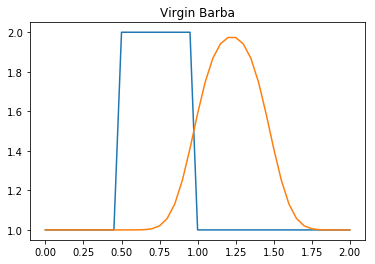

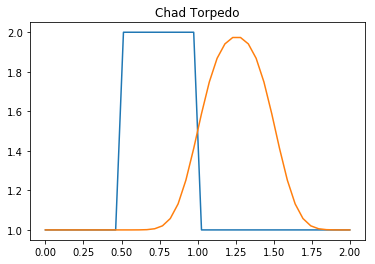

In [86]:
def linearconv(nx):
    dx = 2.0/(nx-1)
    nt = 20
    dt = 0.025
    c = 1.0

    u = numpy.ones(nx)
    u[int (.5/dx): int(1/dx)] = 2.0
    print(u)

    pyplot.figure(1)
    pyplot.title('Virgin Barba')
    pyplot.plot(numpy.linspace(0,2,nx), u)

    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i] - c*dt/dx*(un[i] - un[i-1])

    pyplot.plot(numpy.linspace(0,2,nx), u)

linearconv(41)

def linearConvection(nx):
    dx = 2.0/nx
    nt = 21
    dt = 0.025
    c = 1

    u = numpy.ones((nt,nx))
    u[0][int (.5/dx): int(1/dx)] = 2.0
    print(u[0])

    for n in range(nt-1):
        for i in range(1,nx):
            u[n+1][i] = u[n][i] - c*dt/dx*(u[n][i] - u[n][i-1])
    
    pyplot.figure(2)
    pyplot.title('Chad Torpedo')
    pyplot.plot(numpy.linspace(0,2,nx), u[0], numpy.linspace(0,2,nx), u[nt-1])

linearConvection(40)

### Step 2: 1-D Nonlinear Convection

Partial Differential Equation: $$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0 $$

Discretised: $$ \frac{u^{n+1}_i - u^n_i}{\Delta t} + u^n_i\frac{u^n_i - u^n_{i-1}}{\Delta x} = 0 $$

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


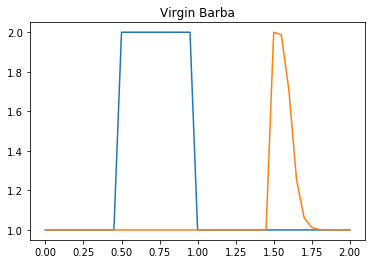

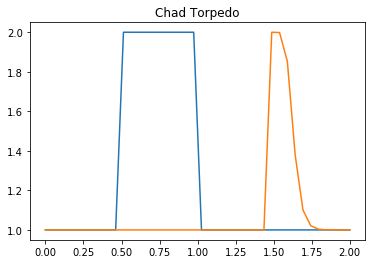

In [73]:
def nonlinearconv(nx):
    dx = 2.0/(nx-1)
    nt = 20
    dt = 0.025

    u = numpy.ones(nx)
    u[int (.5/dx): int(1/dx)] = 2.0
    print(u)

    pyplot.figure(1)
    pyplot.title('Virgin Barba')
    pyplot.plot(numpy.linspace(0,2,nx), u)
    
    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i]*(1 - dt/dx*(un[i] - un[i-1]))

    pyplot.plot(numpy.linspace(0,2,nx), u)

nonlinearconv(41)

def nonLinearConvection(nx):
    dx = 2.0/nx
    nt = 20
    dt = 0.025
    
    u = numpy.ones((nt,nx))
    u[0][int (.5/dx): int(1/dx)] = 2.0
    print(u[0])

    for n in range(nt-1):
        for i in range(1,nx):
            u[n+1][i] = u[n][i]*(1 - dt/dx*(u[n][i] - u[n][i-1]))
            
    pyplot.figure(2)
    pyplot.title('Chad Torpedo')
    pyplot.plot(numpy.linspace(0,2,nx), u[0], numpy.linspace(0,2,nx), u[nt-1])

nonLinearConvection(40)

### Investigation: CFL Condition

$$ \sigma = \frac{u\Delta t}{\Delta x} \leq \sigma_{\max} $$

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


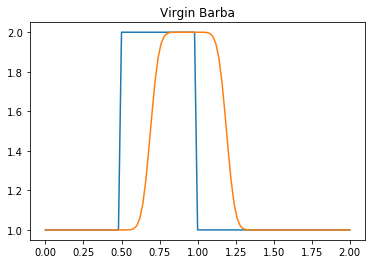

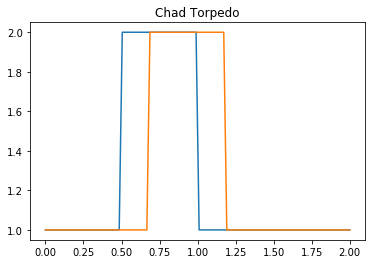

In [177]:
def linearconvCFL(nx):
    dx = 2.0/(nx-1)
    nt = 20
    c = 1.0
    sigma = 0.5
    dt = sigma*dx
    
    u = numpy.ones(nx)
    u[int (.5/dx): int(1/dx)] = 2.0
    print(u)

    pyplot.figure(1)
    pyplot.title('Virgin Barba')
    pyplot.plot(numpy.linspace(0,2,nx), u)

    for n in range(nt):
        un = u.copy()
        for i in range(1,nx):
            u[i] = un[i] - c*dt/dx*(un[i] - un[i-1])

    pyplot.plot(numpy.linspace(0,2,nx), u)

linearconvCFL(101)

def linearConvectionCFL(mesh_size, time, dt):
    dx = 2.0/mesh_size
    c = 1
    time_steps = int(time/dt)
    sigma_max = dt/dx
    if sigma_max > 1:
        correct_dt = dx
        print('Warning: CFL Number greater than 1. Solver will probably produce incorrect results. Maximum time-step should be %s.' %correct_dt)
    ## Initial condition definition
    u = numpy.ones((time_steps,mesh_size))
    u[0][int (.5/dx): int(1/dx)] = 2.0
    print(u[0])

    for n in range(time_steps-1):
        for i in range(1,mesh_size):
            u[n+1][i] = u[n][i] - c*dt/dx*(u[n][i] - u[n][i-1])
            
    pyplot.figure(2)
    pyplot.title('Chad Torpedo')
    pyplot.plot(numpy.linspace(0,2,mesh_size), u[0], numpy.linspace(0,2,mesh_size), u[time_steps-1])
    
linearConvectionCFL(100, 0.2, 0.02)

### Step 3: Diffusion Equation in 1-D

Partial Differential Equation: $$ \frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2} $$

Discretised: $$ \frac{u^{n+1}_i - u^n_i}{\Delta t} = \nu\frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2} $$

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


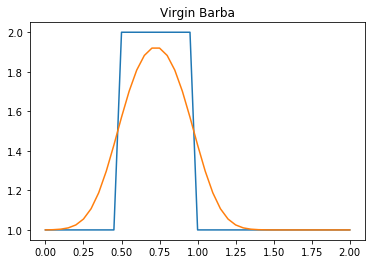

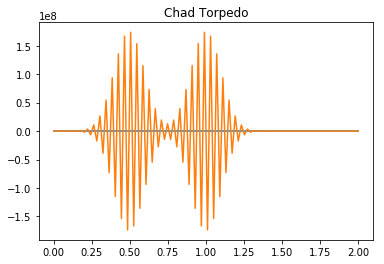

In [175]:
def diffusionequation(nx):
    dx = 2.0/(nx-1)
    nt = 20
    nu = 0.3
    sigma = 0.2
    dt = sigma*dx**2/nu
    
    u = numpy.ones(nx)
    u[int (.5/dx): int(1/dx)] = 2.0
    print(u)

    pyplot.figure(1)
    pyplot.title('Virgin Barba')
    pyplot.plot(numpy.linspace(0,2,nx), u)

    for n in range(nt):
        un = u.copy()
        for i in range(1,nx - 1):
            u[i] = un[i] + nu*dt/dx**2*(un[i+1] - 2*un[i] + un[i-1] )

    pyplot.plot(numpy.linspace(0,2,nx), u)
    
diffusionequation(41)

def diffusionEquation(mesh_size, time, dt):
    dx = 2.0/mesh_size
    time_steps = int(time/dt)
    nu = 0.3
    sigma_max = nu*dt/dx**2
    if sigma_max > 1:
        correct_dt = dx**2/nu
        print('Warning: CFL Number greater than 1. Solver will probably produce incorrect results. Minimum time-step should be %s.' %correct_dt)    
    ## Initial condition definition
    u = numpy.ones((time_steps,mesh_size))
    u[0][int (.5/dx): int(1/dx)] = 2.0
    print(u[0])

    for n in range(time_steps-1):
        for i in range(1,mesh_size - 1):
            u[n+1][i] = u[n][i] + nu*dt/dx**2*(u[n][i+1] - 2*u[n][i] + u[n][i-1])

    pyplot.figure(2)
    pyplot.title('Chad Torpedo')
    pyplot.plot(numpy.linspace(0,2,mesh_size), u[0], numpy.linspace(0,2,mesh_size), u[time_steps-1])
    
diffusionEquation(100, 0.033333, 0.001)